<a href="https://colab.research.google.com/gist/jdrapala/8dc41b00d63cef0483529a262f5ebc2f/sadism_2_data_processing_and_acquisition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Contents:

1.   arrays (`numpy.array`),
2.   random number generators (`numpy.random`),
3.   acquisition of real datasets.

The aim is to prepare you for working with real data and to be able to provide synthetic ones.

**Remember to experiment** with the code. Do not be a passive learner.

## Arrays and matrices: transformations and calculations

**Array** is not a native Python data structure. It comes with the `numpy` library.

We are going to call every two-dimensional array a **matrix**.

In [6]:
import numpy as np
import sns as sns

In [7]:
tab = np.arange(12) + 1
print(tab)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


Some `numpy` methods commonly use arrays filled with a regular collection of numbers. The following list you may consider useful:<br>
`arange`, `linspace`, `zeros`, `ones`, `zeros_like`, `ones_like`, `empty`, `empty_like`, `eye`, ... <br>
Other ones are available in the section devoted to random number generators.

Array **size** and **shape**.

In [8]:
tab.size

12

In [9]:
tab.shape

(12,)

The shape of an array is described by a tuple. <br>
The `tab` is single-dimensional or *flat*.

The shape of an array (but obviously not the size) can be altered by the method `reshape`.

In [10]:
mat = tab.reshape(4,3)
print(mat)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [11]:
print(mat.size)
print(mat.shape)

12
(4, 3)


Argument `-1` stands for ,,let the `reshape` determine the correct value''.

In [12]:
tab.reshape(4,-1)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

It may happen that a library method requires the input array to be two-dimensional, even those composed of only a single column or row. Moreover, a row-wise of column-wise arrangement may be required. <br>
This is a way to transform a flat array into a row or column vector having two defined dimensions.  

In [13]:
tab.reshape(1,-1)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

In [14]:
mat = tab.reshape(2,-1)
print(mat)

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]


In [15]:
print(tab.shape)
print(mat.shape)

(12,)
(2, 6)


And now, <font color='red'>check this out</font>:

In [16]:
mat = tab.reshape(4,3)
print(tab)
print(mat, end='\n\n')
mat[1,1] = 0
print(mat)
print(tab)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

[[ 1  2  3]
 [ 4  0  6]
 [ 7  8  9]
 [10 11 12]]
[ 1  2  3  4  0  6  7  8  9 10 11 12]


Editing `mat` has a surprising side effect. Associated entries of the `tab` are also changed. <br>
We say that `mat` is a *view* on the `tab`, because it gives access to the same area in memory, but in a different way.

If you need the `tab` to be a copy of the object `mat`, you have to call the `copy()` method.

In [17]:
mat = tab.reshape(4,3).copy()
print(tab)
print(mat, end='\n\n')
mat[1,1] = 100
print(mat)
print(tab)

[ 1  2  3  4  0  6  7  8  9 10 11 12]
[[ 1  2  3]
 [ 4  0  6]
 [ 7  8  9]
 [10 11 12]]

[[  1   2   3]
 [  4 100   6]
 [  7   8   9]
 [ 10  11  12]]
[ 1  2  3  4  0  6  7  8  9 10 11 12]


**Remember**: since variables (names) in Python are pointers to objects held in memory, the assignment <br>
 ```variable2 = variable1``` <br>
results in two names pointing to the same object. <br>
When you need a copy, then you execute: <br>
 ```variable2 = variable1.copy()``` <br>
 or <br>
 ```variable2 = variable1.deepcopy()``` <br>
when the `variable1` is a nested structure (i.e. a list of lists).

**Composition** of arrays/matrices. <br>
Useful when you need to integrate different datasets into a single one.

In [18]:
A = np.arange(6).reshape(2,3)
B = np.arange(7,13).reshape(2,3)
print(A, B, sep='\n', end='\n\n')
print(np.vstack([A,B]), end='\n\n')
print(np.hstack([A,B]))

[[0 1 2]
 [3 4 5]]
[[ 7  8  9]
 [10 11 12]]

[[ 0  1  2]
 [ 3  4  5]
 [ 7  8  9]
 [10 11 12]]

[[ 0  1  2  7  8  9]
 [ 3  4  5 10 11 12]]


Sometimes you need to do the opposite, that is, to ,,flatten'' an array.

In [19]:
print(np.vstack([A,B]).flatten())

[ 0  1  2  3  4  5  7  8  9 10 11 12]


**Matrix computations** <br>
Two-dimensional arrays can be multiplied, inverted, or transposed. It is also possible to calculate the determinant, eigenvalues, and other quantities. <br>
By the way, do you remember **what the determinant actually is**? I do not mean, how to calculate it, but what is it?

The library `numpy.linalg` contains fundamental linear algebra operations.

In [20]:
from numpy.linalg import det, inv

We will prepare a matrix `A` for experimentation purposes.

In [21]:
tab = np.arange(4) + 1
print(tab**2 - tab)

[ 0  2  6 12]


In [22]:
tab = tab.reshape(1,-1)

A = np.dot(tab.T, np.flip(tab))
print(A,'\n')
print(A[2,:],'\n')
A[2,1:4] = np.arange(3)
A[:,2] = -1
A[-2,2] += 100
A[A > 8] = -300
print(A)

[[ 4  3  2  1]
 [ 8  6  4  2]
 [12  9  6  3]
 [16 12  8  4]] 

[12  9  6  3] 

[[   4    3   -1    1]
 [   8    6   -1    2]
 [-300    0 -300    2]
 [-300 -300   -1    4]]


In [23]:
det(A)

-94199.99999999996

Take a look at the outcome of these two commands: <br>
```python
A @ inv(A)
A * inv(A)
```
and try to tell which one is matrix multiplication and which is element-wise multiplication?

In [24]:
# this is the cell for your own
dot = A.dot(inv(A))
print('Dot product:\n',dot,'\n')
print('Dot product:\n',A @ inv(A), '\n')
print('Element-wise multiplication:\n',A * inv(A), '\n')


tolerance = 1e-10
is_identity = np.allclose(dot, np.eye(len(A)), atol=tolerance)
if is_identity:
    print(np.eye(len(A)))

Dot product:
 [[ 1.00000000e+00  0.00000000e+00  8.67361738e-19  3.46944695e-18]
 [-2.66453526e-15  1.00000000e+00  0.00000000e+00  3.46944695e-18]
 [ 3.10862447e-14  3.81916720e-14  1.00000000e+00  0.00000000e+00]
 [ 1.75859327e-13  1.95399252e-14  2.22044605e-16  1.00000000e+00]] 

Dot product:
 [[ 1.00000000e+00  0.00000000e+00  8.67361738e-19  3.46944695e-18]
 [-2.66453526e-15  1.00000000e+00  0.00000000e+00  3.46944695e-18]
 [ 3.10862447e-14  3.81916720e-14  1.00000000e+00  0.00000000e+00]
 [ 1.75859327e-13  1.95399252e-14  2.22044605e-16  1.00000000e+00]] 

Element-wise multiplication:
 [[ 7.92305732e+00 -2.96159236e+00  3.31210191e-03  6.36942675e-05]
 [-1.61005520e+01  6.05681529e+00 -3.35456476e-03 -6.53927813e-03]
 [ 6.00000000e+02  0.00000000e+00  3.44647048e-16 -2.29764699e-18]
 [ 8.65605096e+02 -5.76114650e+02 -3.18471338e-03  3.82165605e-02]] 

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


Large matrices may be conveniently depicted as images.

In [25]:
import matplotlib.pyplot as plt

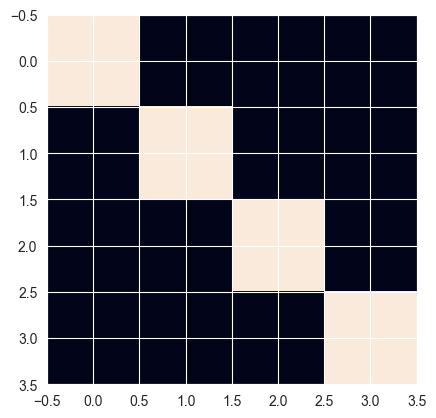

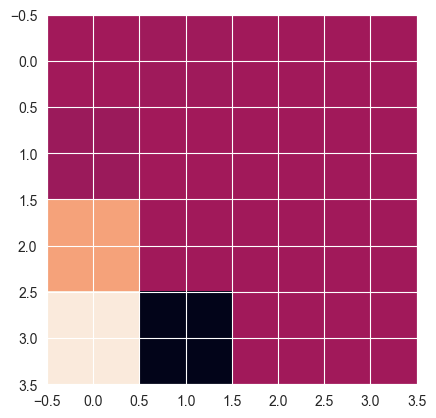

In [26]:
plt.imshow(np.eye(len(A)))
plt.show()

plt.imshow(A * inv(A))
plt.show()

The [`imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) method allows one to freely assign colors to numerical values  (parameter `cmap`).


**Remember**: <font color='blue'>matrix notation</font> and <font color='orange'> the `numpy` notation for array processing </font> do not match fully. This is because *the goals of mathematic notation* and *the goals of programming tools* are different. <br>
The goal of `numpy` library is to provide a comprehensive and effective way to express those operations and transformations that are commonly performed on datasets. **Think for yourself** what the goals of matrix notation in mathematics could be (or just recall from linear algebra classes). <br>
Naturally, some elements of both notation are similar. Here they are: <br>
$A^{-1} \quad \rightarrow \quad$ `inv(A)` <br>
$A^{\text{T}} \quad \rightarrow \quad$ `A.T` <br>
$A\cdot B \quad \rightarrow \quad$  `A @ B` lub `np.dot(A,B)` <br>
The notation of some commonly used operations on the data is made simple in `numpy` for the sake of clarity of the code and minimization of execution time. The usage of computational resources is not the issue in the mathematical universe, therefore <font color='red'>**do not confuse**</font> mathematical notation and `numpy` notation. A few examples are given below: <br>
```A - 1 ``` - subtraction of a scalar value from all entries of a matrix, <br>
``` A*B ``` - element-wise multiplication, <br>
``` A**2 ``` - exponentiation of matrix elements , <br>
e.t.c. 

### Random numbers generators

The procedures introduced here generate arrays filled with random numbers. <br>
The purpose of a procedure and its arguments may easily be inferred from its name. <br>
If you find something unclear, remember to **experiment with the code**. 

In [27]:
np.random.choice(['Heads', 'Tails'], p=[0.95, 0.05], size=8)

array(['Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads', 'Heads',
       'Heads'], dtype='<U5')

In [28]:
np.random.randint(low=1, high=7, size=20)

array([6, 1, 2, 2, 4, 3, 1, 4, 6, 5, 5, 6, 5, 5, 5, 3, 4, 2, 1, 4])

In [29]:
np.random.uniform(low=0, high=10, size=7)    # check also np.random.rand()

array([6.30442018, 4.18865841, 1.87732339, 0.37752508, 7.2059805 ,
       8.47769531, 0.04360176])

In [30]:
print([np.random.rand() for i in range(10)])

[0.28318977905847775, 0.7020865209076278, 0.07319541452697231, 0.5951642074765333, 0.8348892629676318, 0.4488266579381647, 0.3295851943087085, 0.38923453369050476, 0.7546233982311887, 0.02375453304917774]


In [31]:
np.random.normal(loc=80, scale=5, size=10)   # check also np.random.randn()

array([91.3001599 , 87.71882906, 81.50734433, 81.0943997 , 79.64886644,
       77.33716471, 74.08358462, 80.4775228 , 89.52769074, 75.81943061])

In [32]:
print([np.random.randn() for i in range(10)])

[0.3048291909670248, 0.45439655801114515, -0.12006745166662053, -1.7356741705098375, -0.25143285260765613, -0.1373523212749859, 0.1448304105981668, -0.005147501066506889, 0.3549965748099183, -1.259527268984274]


In [33]:
np.random.binomial(n=100, p=0.5, size=10)

array([53, 58, 45, 53, 51, 58, 58, 48, 56, 46])

In [34]:
np.random.poisson(lam=3, size=10)

array([5, 2, 1, 4, 4, 5, 3, 4, 0, 1])

<font color='green'>The laboratory of random phenomena. </font><br>
Naked human intuition does not cope well with randomness. To compensate for our brain flaws, we can use computer simulations.

This section is optional. It is full of visual illustrations of randomly generated numbers that aim to illuminate probability distributions while entertaining.

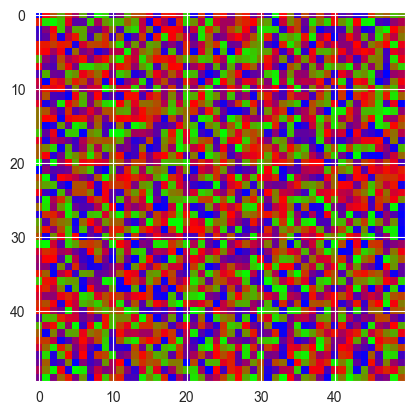

In [35]:
A = np.random.randint(0,256, size=(50, 50))
plt.imshow(A, interpolation='nearest', cmap=plt.cm.brg_r)
plt.show()

Do you recognize any patterns in the above image?

Here is an example of what is called *random walking*.

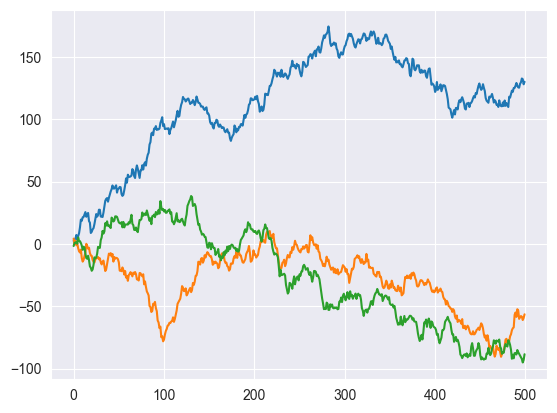

In [36]:
x = np.random.normal(0,3, size=(500,3)).cumsum(axis=0)
plt.plot(x)
plt.show()

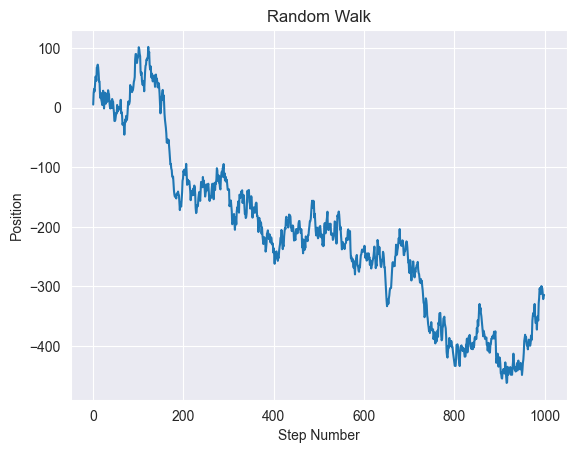

In [37]:
import numpy as np
import matplotlib.pyplot as plt


steps = np.random.normal(loc=0, scale=10, size=1000)

position = np.cumsum(steps)

plt.plot(position)
plt.title('Random Walk')
plt.xlabel('Step Number')
plt.ylabel('Position')
plt.show()


Do you think this looks like stock prices?

Take a look at random walking on a plane.

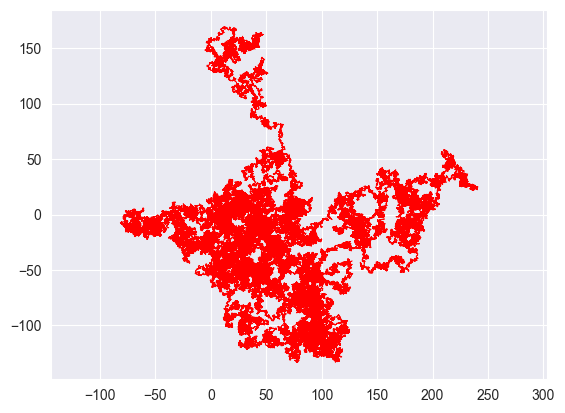

In [38]:
x = np.random.normal(0,0.2, size=(1000000,2)).cumsum(axis=0)
plt.plot(x[:,0], x[:,1], linewidth=0.5, color='red')
plt.axis('equal')
plt.show()

Even a layman can spot the difference between the uniform and normal distributions when given the result of the following code.

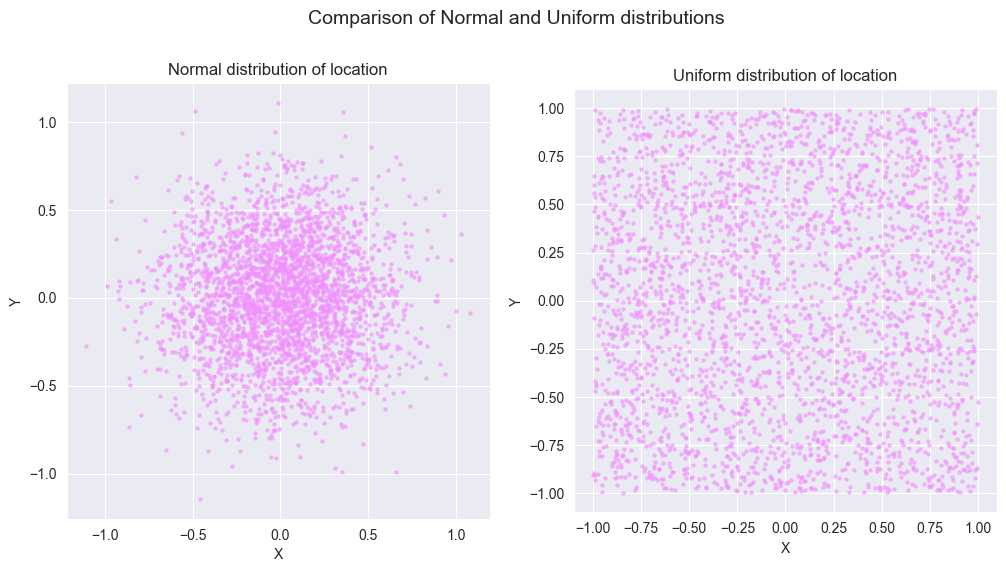

In [39]:
import numpy as np
import matplotlib.pyplot as plt

N = 3000

X = np.random.normal(loc=0, scale=1/3, size=N)
Y = np.random.normal(loc=0, scale=1/3, size=N)

X2 = np.random.uniform(low=-1, high=1, size=N)
Y2 = np.random.uniform(low=-1, high=1, size=N)

fig, ax = plt.subplots(1, 2, figsize=(12,6))
titles = ['Normal distribution of location', 'Uniform distribution of location']
for i, data in enumerate([(X, Y), (X2, Y2)]):
    ax[i].scatter(data[0], data[1], s=5, color='#f28fff', alpha=.5)
    ax[i].set_aspect('equal')
    ax[i].set_title(titles[i], fontsize=12)
    ax[i].set_xlabel('X', fontsize=10)
    ax[i].set_ylabel('Y', fontsize=10)

fig.suptitle('Comparison of Normal and Uniform distributions', fontsize=14)

plt.show()

This example is more advanced. <br>
Take any layman who is near and show him/her two previous images to learn him/her the difference between uniform and normal distribution. Next, try your new knowledge on the following two images (remember to hide their titles from the viewer). Let her/him guess which image is composed of circles having diameters uniformly distributed.


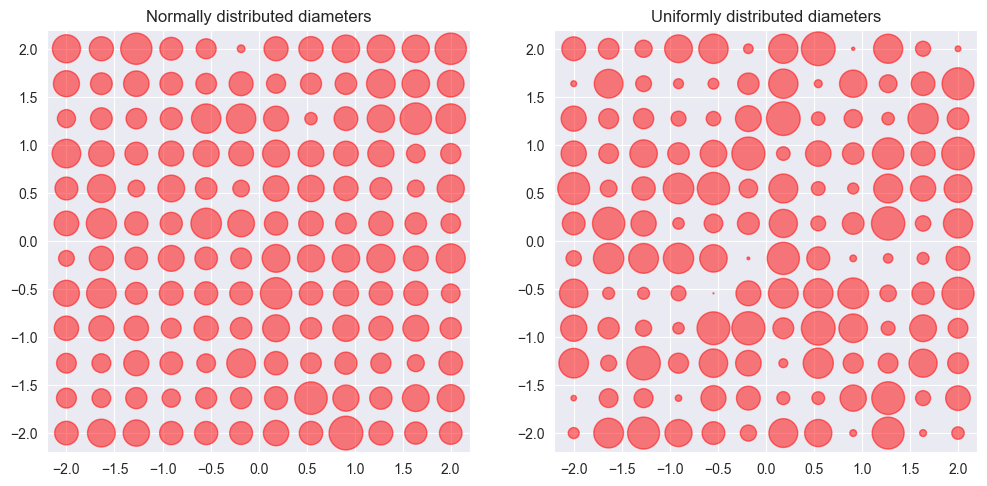

In [40]:
N = 12
x = np.linspace(start=-2, stop=2, num=N)
y = np.linspace(start=-2, stop=2, num=N)
X, Y = np.meshgrid(x, y)
X = X.flatten()
Y = Y.flatten()

fig, ax = plt.subplots(1, 2, figsize=(12,6))

diameter = np.random.normal(loc = 300, scale=100, size=N*N)
ax[0].scatter(X, Y, s=diameter, color='red', alpha=.5)
ax[0].set_aspect('equal')
ax[0].set_title('Normally distributed diameters')
diameter = np.random.uniform(low=0, high=600, size=N*N)
ax[1].scatter(X, Y, s=diameter, color='red', alpha=.5)
ax[1].set_aspect('equal')
ax[1].set_title('Uniformly distributed diameters')

plt.show()

The following is another inspiration to make your own designed experiments with both the diameters and locations determined randomly.

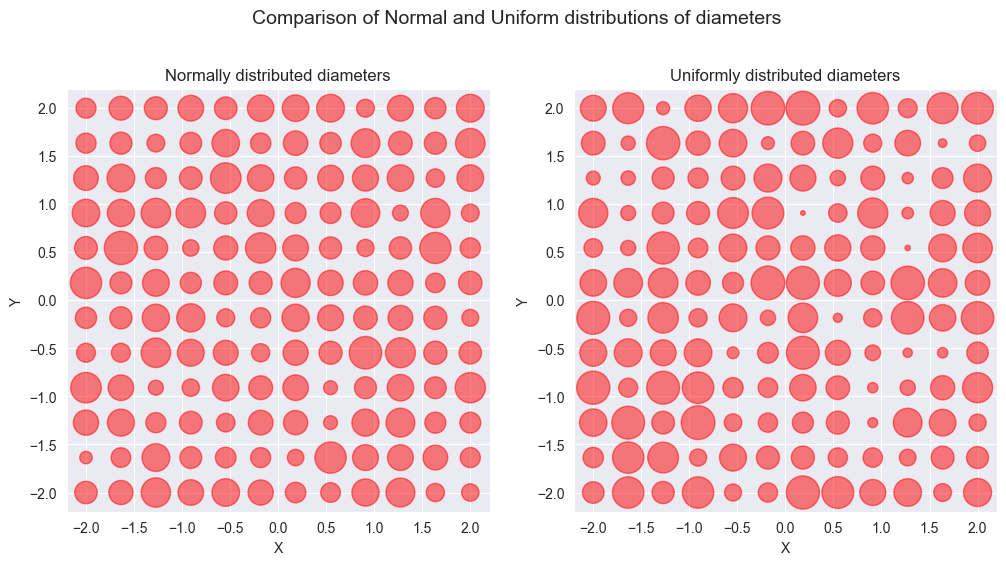

In [41]:
N = 12
x = np.linspace(start=-2, stop=2, num=N)
y = np.linspace(start=-2, stop=2, num=N)
X, Y = np.meshgrid(x, y)
X = X.flatten()
Y = Y.flatten()

fig, ax = plt.subplots(1, 2, figsize=(12,6))

diameter = np.random.normal(loc=300, scale=100, size=N*N)
ax[0].scatter(X, Y, s=diameter, color='red', alpha=.5)
ax[0].set_aspect('equal')
ax[0].set_title('Normally distributed diameters')
ax[0].set_xlabel('X', fontsize=10)
ax[0].set_ylabel('Y', fontsize=10)

diameter = np.random.uniform(low=0, high=600, size=N*N)
ax[1].scatter(X, Y, s=diameter, color='red', alpha=.5)
ax[1].set_aspect('equal')
ax[1].set_title('Uniformly distributed diameters')
ax[1].set_xlabel('X', fontsize=10)
ax[1].set_ylabel('Y', fontsize=10)

plt.suptitle('Comparison of Normal and Uniform distributions of diameters', fontsize=14)

plt.show()


C:\Users\AndyNB\AppData\Local\Temp\ipykernel_10624\848835068.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, s=diameter, alpha=0.6, edgecolor='none', cmap='plasma')


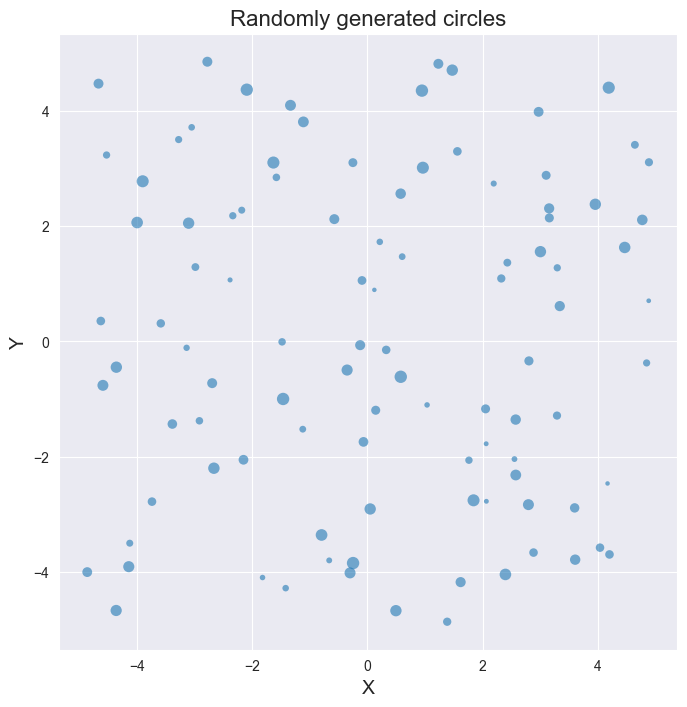

In [42]:

N = 100
x = np.random.uniform(low=-5, high=5, size=N)
y = np.random.uniform(low=-5, high=5, size=N)
diameter = np.random.uniform(low=10, high=80, size=N)

fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(x, y, s=diameter, alpha=0.6, edgecolor='none', cmap='plasma')
ax.set_aspect('equal')
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Y', fontsize=14)
ax.set_title('Randomly generated circles', fontsize=16)

plt.show()

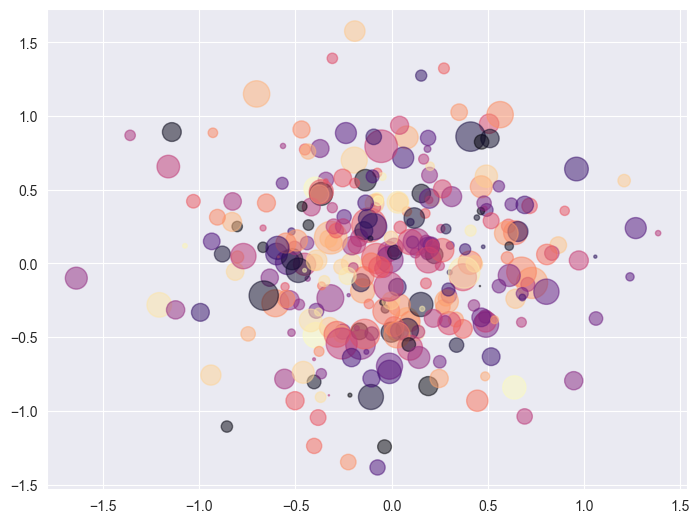

In [43]:
from matplotlib import cm
color_map = cmap=plt.get_cmap('magma')

N = 300
X = np.random.normal(0, 0.5, N)
Y = np.random.normal(0, 0.5, N)
diameter = 200*abs(np.random.normal(0, 1, N))
color = abs(np.random.uniform(0, 1, N))

plt.axes([0, 0, 1, 1])
plt.scatter(X, Y, s=diameter, c=color, alpha=.5, cmap=color_map)

plt.show()

Monte Carlo simulation is a method that employs a random number generator to estimate the values of some mathematical quantities, such as $\pi$, definite integrals, and many others. Try to guess the basic steps of the Monte Carlo method using only the code below. The aim of the code is to calculate the area under the curve (definite integral).

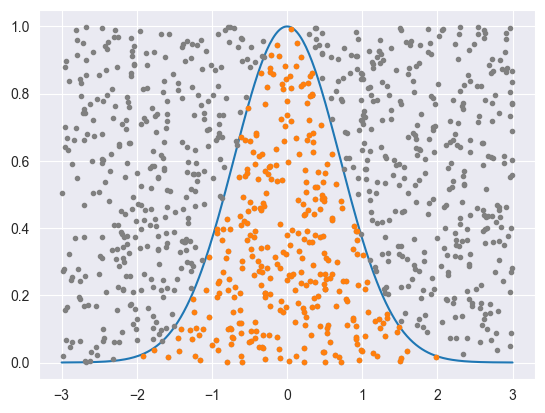

1.8895764987188948


In [44]:
def f(x):
    return np.exp(-x**2)

a, b = -3, 3
x_axis = np.linspace(start=a, stop=b, num=300)
y_axis = f(x_axis)
ymin, ymax = y_axis.min(), y_axis.max()
N = 1000
x = np.random.uniform(a, b, size=(1,N))
fx = f(x)
y = np.random.uniform(ymin, ymax, size=(1,N))

p_below = y < fx 
x_below = x[p_below]
y_below = y[p_below]

plt.plot(x_axis, f(x_axis))
plt.plot(x, y, '.', color='gray')
plt.plot(x_below, y_below, '.', color='tab:orange')
plt.show()

counter = x_below.size / x.size
print(counter*(b-a)*(ymax-ymin))

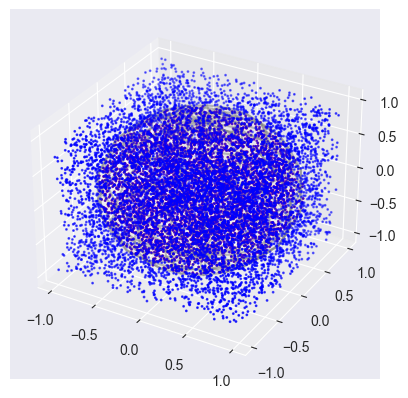

Estimated volume of sphere = 4.1512
Should be 4.1888


In [70]:
import math
import numpy as np
import matplotlib.pyplot as plt

def f(x, y, z):
    return x**2 + y**2 + z**2 <= 1

a, b = -1, 1

N = 10000
x = np.random.uniform(a, b, size=N)
y = np.random.uniform(a, b, size=N)
z = np.random.uniform(a, b, size=N)

inside = f(x, y, z)

x_inside = x[inside]
y_inside = y[inside]
z_inside = z[inside]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
xs = np.cos(u)*np.sin(v)
ys = np.sin(u)*np.sin(v)
zs = np.cos(v)
ax.plot_wireframe(xs, ys, zs, color='gray', alpha=0.5)
ax.scatter(x, y, z, s=1, color='blue')
ax.scatter(x_inside, y_inside, z_inside, s=1, color='red')
plt.show()

volume_box = (b-a)**3
volume_sphere = volume_box * len(x_inside) / N
print(f"Estimated volume of sphere = {volume_sphere:.4f}")
print(f"Should be {4/3*math.pi*1:.4f}")


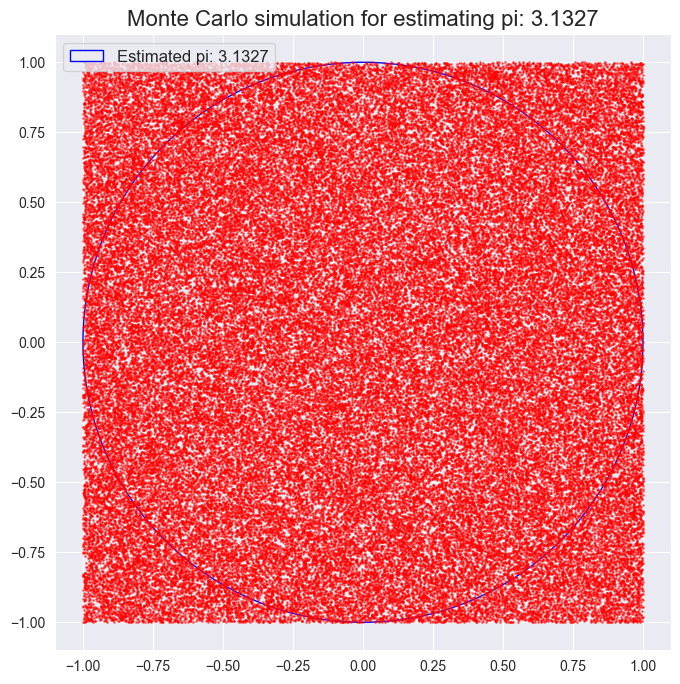

In [73]:
import numpy as np
import matplotlib.pyplot as plt

N = 100000
radius = 1.0

x = np.random.uniform(low=-1.0, high=1.0, size=N)
y = np.random.uniform(low=-1.0, high=1.0, size=N)

distance = np.sqrt(x**2 + y**2)

num_inside = np.sum(distance <= radius)

pi = 4.0 * num_inside / N

fig, ax = plt.subplots(figsize=(8, 8))
circle = plt.Circle((0, 0), radius, facecolor='none', edgecolor='blue')
ax.add_artist(circle)
ax.scatter(x, y, s=1, alpha=0.5, color='red')

ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])
ax.set_aspect('equal')

ax.set_title(f'Monte Carlo simulation for estimating pi: {pi:.4f}', fontsize=16)
ax.legend([f'Estimated pi: {pi:.4f}'], loc='upper left', fontsize=12)

plt.show()


### Acquisition of real data

This section aims at providing you code snippets that you could use to acquire real data from the Internet. During the lab meeting, fly through it, trying to learn how easy it is to get real data for any purpose. You may find this section useful later on, during the next meetings, when working in your company, when doing your own research. Feel free to use these codes anytime. My intention here is to give you inspiration rather than raw instructions, to help you to make a first step towards handling real data. Note that these are only examples; there are plenty of sources of real data, you only need to get documentation of data provider.
If you find this section interesting, you should check out the term Open Source INTelligence (OSINT).

Contents of this section:
*   ready-to-use repositories intended for educational purposes and testing machine learning routines,
*   web-scrapping,
*   downloading files,
*   search queries data ([Google Trends](https://trends.google.pl/trends/?geo=PL)),
*   [Meteostat](https://meteostat.net/en/) as a representative of solutions delivering a specialized API (Application Programming Interface).



**Ready-to-use repositories** intended for educational purposes and testing of machine learning routines. <br>
It is good when you begin your journey toward data analysis, but you should quickly advance toward real data.

The [Scikit-learn](https://scikit-learn.org/stable/datasets.html) library delivers few ready-to-use datasets.

In [47]:
from sklearn import datasets

datasets.load_digits()
#datasets.load_boston()
#datasets.load_iris()

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

The [Seaborn](https://seaborn.pydata.org/generated/seaborn.load_dataset.html) library provides similar dataset, but contained in `pandas` data frames.

In [48]:
from seaborn import load_dataset
df = load_dataset('flights')
print(df)

     year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432

[144 rows x 3 columns]


[Kaggle](https://www.kaggle.com/datasets) provides a collection of ready-to-use datasets and appropriate tutorials.

**Web scraping** <br>
The `requests` library is here to send HTTP requests. <br>
The resulting HTML code is parsed by the `BeautifulSoup` library into the search tree that allows the extraction of the required data.

In [49]:
#pip install requests
import lxml

In [50]:
import pandas as pd    # to put the extracted data into the data frame
import requests
import lxml
from bs4 import BeautifulSoup

URL = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_area"
resp = requests.get(URL)
if resp.status_code == 200:    # did you manage to open the webpage?
    soup = BeautifulSoup(resp.content,'html.parser')  # to create the searching tree
    tab = soup.find('table',{'class':"wikitable"})   # to extract the table from the tree
df = pd.read_html(str(tab))[0]         # to convert the table to a data frame
df.head()


,Rank,Country / Dependency,Total in km2 (mi2),Land in km2 (mi2),Water in km2 (mi2),% water,Notes
0,NaN,World,"510,072,000 (196,940,000)","148,940,000 (57,510,000)","361,132,000 (139,434,000)",70.8,NaN
1,1,Russia,"17,098,246 (6,601,670)","16,378,410 (6,323,740)","719,836 (277,930)",4.2,[Note 2]
2,NaN,Antarctica,"14,200,000 (5,500,000)","14,200,000 (5,500,000)",0 (0),0,[Note 3]
3,2,Canada,"9,984,670 (3,855,100)","9,093,507 (3,511,023)","891,163 (344,080)",8.9,[Note 4]
4,3 or 4 [Note 5],China,"9,596,961 (3,705,407)","9,326,410 (3,600,950)","270,550 (104,460)",2.8,[Note 6][7]


Then you can move on to dataframe processing, as you learned in the previous lab notebook.

**Internet files**. <br>
The `urllib` library allows not only to send HTML requests, but also authentication, redirection, and downloading files from a given destination. <br>
Recall to check whether the file is already on disk before starting the download process. Standard library `os` can do the check.

In [51]:
import urllib.request
import os

# The file is quite large; it takes some time to download it at load in memory.

file = 'owid-covid-data.csv'
URL = 'https://covid.ourworldindata.org/data/' + file
if not os.path.isfile(file):            # do I have the file on my disk?
    print('Downloading file ', URL)
    urllib.request.urlretrieve(URL, file)   # get the file
    print('Done.')
else:
    print('This file is already in the disk.')

This file is already in the disk.


In [52]:
dataset = pd.read_csv(file)

dataset['date'] = pd.DatetimeIndex(dataset['date'])    # convert the string to an interpretable date
dataset.set_index('date', inplace=True)           # let the rows be indexed by date
dataset.sample(4)                # show 4 randomly chosen rows

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-06-18,TCA,North America,Turks and Caicos Islands,12.0,0.0,0.000,1.0,0.0,0.000,262.433,...,NaN,NaN,NaN,80.22,NaN,45726.0,NaN,NaN,NaN,NaN
2022-07-01,BRN,Asia,Brunei,163527.0,0.0,929.143,102.0,0.0,0.143,364201.050,...,30.9,NaN,2.7,75.86,0.838,449002.0,NaN,NaN,NaN,NaN
2020-03-07,VGB,North America,British Virgin Islands,NaN,0.0,0.000,NaN,0.0,0.000,NaN,...,NaN,NaN,NaN,79.07,NaN,31332.0,NaN,NaN,NaN,NaN
2021-11-09,LAO,Asia,Laos,47842.0,786.0,983.714,86.0,4.0,2.714,6353.961,...,51.2,49.839,1.5,67.92,0.613,7529477.0,NaN,NaN,NaN,NaN


In [53]:
print('Total number of countries:', len(dataset['location'].unique()), '\n')

Total number of countries: 255 



New cases data have a 7 day cycle. During the weekends, fewer cases are reported, but on Monday labs merge. Therefore, we pass the time series through the *Moving Average* window of length 7. The selection of a moving window is performed by the `rolling` method, and the `mean` method averages measurements.

A new averaged time series will be added as a new column using the `insert` method.

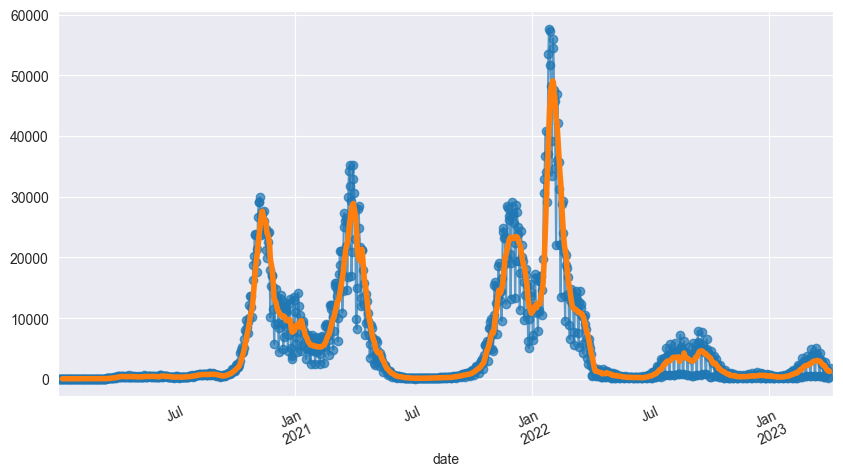

In [54]:
dataset_Pol = dataset[dataset['location'] == 'Poland']
feature = 'new_cases'
dataset_Pol.insert(1, 'MA_'+feature, dataset_Pol[feature].rolling(7).mean())  

dataset_Pol[feature].plot(rot=25, figsize=(10,5), marker='o', alpha=0.7)
dataset_Pol['MA_'+feature].plot(rot=25, figsize=(10,5), linewidth=4)
plt.show()

In [55]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.facebook.com/"
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

links = []
for link in soup.find_all('a'):
    links.append(link.get('href'))

df = pd.DataFrame(links, columns=['Links'])

print(df)


                                                Links
0                                                   #
1   https://www.facebook.com/recover/initiate/?pri...
2                                                   #
3           /pages/create/?ref_type=registration_form
4                           https://www.facebook.com/
5                         https://sz-pl.facebook.com/
6                         https://ru-ru.facebook.com/
7                         https://de-de.facebook.com/
8                         https://fr-fr.facebook.com/
9                         https://it-it.facebook.com/
10                        https://uk-ua.facebook.com/
11                        https://es-es.facebook.com/
12                        https://pt-br.facebook.com/
13                        https://ar-ar.facebook.com/
14                                                  #
15                                              /reg/
16                                            /login/
17                          

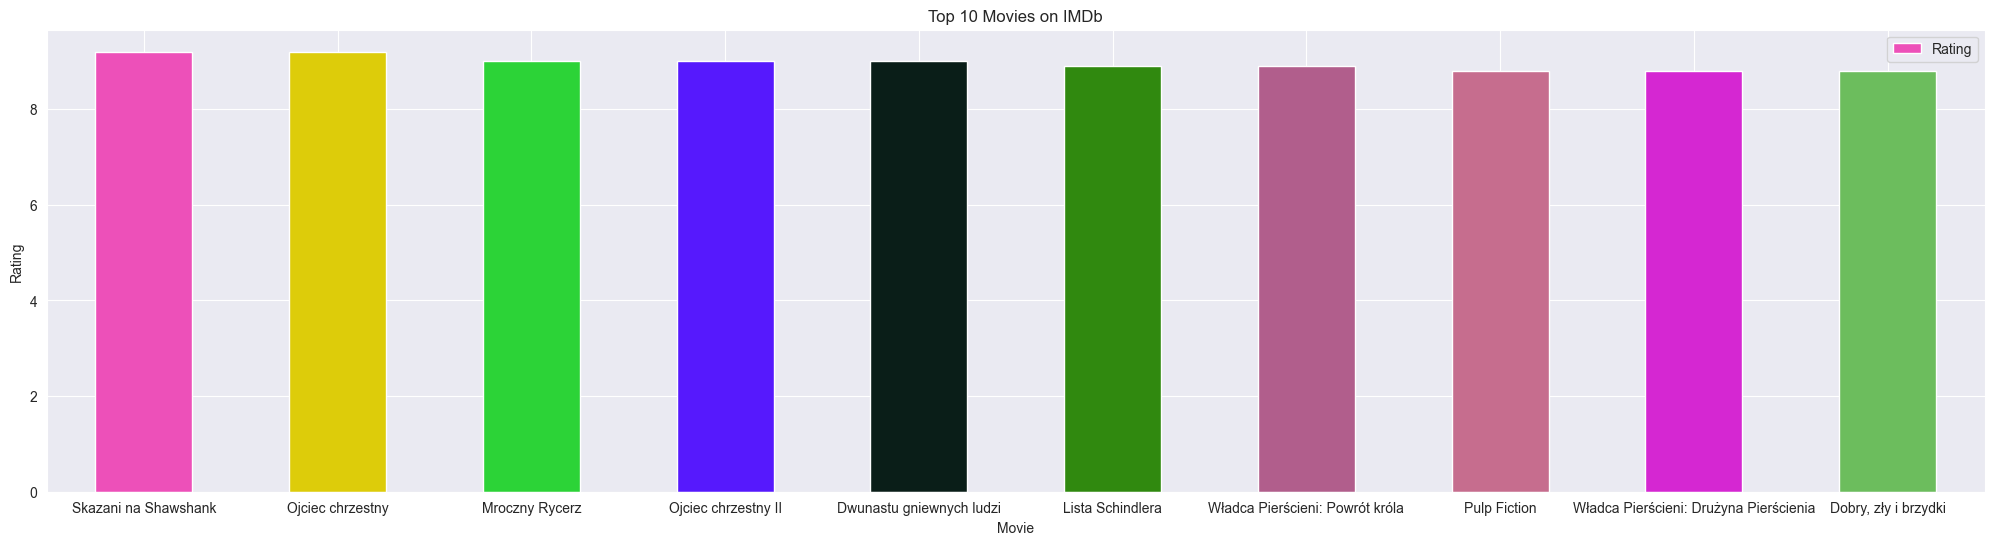

In [56]:
import requests
import random
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


url = 'https://www.imdb.com/chart/top'


response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

movie_titles = []
movie_ratings = []
movie_list = soup.find('tbody', class_='lister-list')
for movie in movie_list.find_all('tr')[:10]:
    title = movie.find('td', class_='titleColumn').find('a').text
    rating = float(movie.find('td', class_='ratingColumn').find('strong').text)
    movie_titles.append(title)
    movie_ratings.append(rating)

df = pd.DataFrame({
    'Movie': movie_titles,
    'Rating': movie_ratings
})

colors = []
for i in range(len(df)):
    r = random.uniform(0, 1)
    g = random.uniform(0, 1)
    b = random.uniform(0, 1)
    colors.append((r, g, b))

fig, ax = plt.subplots(figsize=(25,6))
ax = df.plot(kind='bar', x='Movie', y='Rating', rot=0, color=colors, ax=ax)
ax.set_title('Top 10 Movies on IMDb')
ax.set_xlabel('Movie')
ax.set_ylabel('Rating')
plt.show()


#### Access to the data by **API**

**Google Trends** is a good source of data on what people are interested in.

The library `pytrends` probably needs to be installed. This is an unofficial API for Google Trends data.

In [57]:
#!pip install pytrends

The `TrendReq` object gives access to current data on queries put in Google search toolbar.

In [74]:
from pytrends.request import TrendReq

pytrend = TrendReq()    # to create the instance of TrendReq object/class

In [59]:
#!pip install --upgrade pip
#!pip install git+https://github.com/GeneralMills/pytrends

In [75]:
keyword = 'pies'
pytrend.build_payload(kw_list=[keyword])

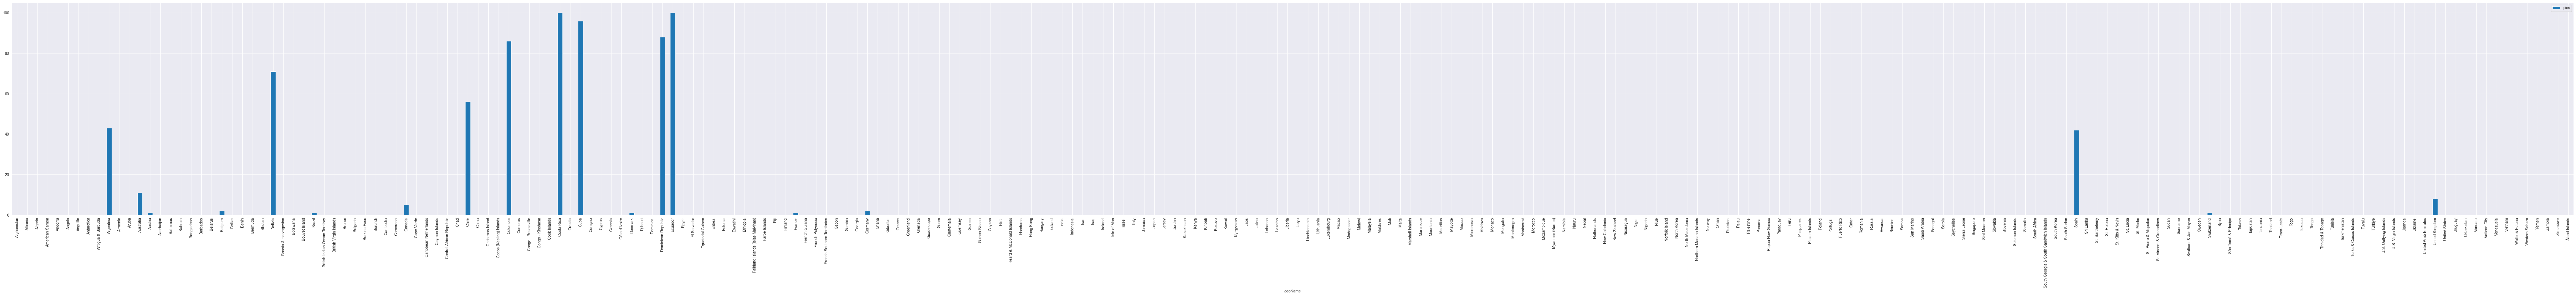

In [76]:
df = pytrend.interest_by_region()
df.reset_index().plot(x='geoName', y=keyword, figsize=(120, 10), kind ='bar');

In [78]:
df = pytrend.trending_searches(pn='france')
df.head(10)

,0
0,Galtier
1,Depardieu
2,SNUS
3,Riopy
4,Real Madrid - Chelsea
5,Macron Pays-Bas
6,The Marvels
7,Ligue des champions
8,Benfica
9,France-Canada


**Meteostat** 

In [79]:
#!pip install meteostat

In [80]:
#!pip install joypy   # to illustrate probability distributions

In [81]:
import meteostat
from datetime import datetime    # to make the date an interpretable object, not only a string 
import joypy

The `Stations` method returns an object containing all meteorological stations from which we can access data. The `nearby` method finds a station that is closest to a given geographic coordinates. <br>
The acquisition of both measurement data and station data is carried out using the method `fetch`. The outcome is a data frame.

In [82]:
# specify the range of dates
year = 2019
start, end = datetime(year, 1, 1), datetime(year, 12, 31)

# find the station of interest
available_stations = meteostat.Stations()
wroclaw = available_stations.nearby(51,17)
wroclaw = wroclaw.fetch(1)

# fetch the daily data (meteostat.Daily)
data = meteostat.Daily(wroclaw, start, end)
data = data.fetch()
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2019-01-01,5.4,0.0,8.1,0.0,NaN,261.0,23.9,57.4,1017.5,NaN
2019-01-02,1.2,-0.9,6.0,1.0,NaN,315.0,20.0,63.0,1017.1,NaN
2019-01-03,-2.0,-3.9,0.3,0.8,NaN,320.0,10.8,35.2,1028.1,NaN
2019-01-04,-1.3,-4.5,1.4,2.3,30.0,290.0,13.8,35.2,1027.2,NaN
2019-01-05,2.9,1.0,5.3,3.6,NaN,316.0,13.8,37.0,1016.6,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-12-27,2.3,1.7,4.3,3.8,NaN,316.0,8.7,25.9,1026.3,NaN
2019-12-28,1.0,0.9,3.1,0.0,10.0,329.0,9.3,29.6,1037.6,NaN
2019-12-29,0.1,-1.4,1.5,0.0,NaN,289.0,6.5,18.5,1040.3,NaN


In [83]:
from datetime import datetime, timedelta
import meteostat

year = 2022
start = datetime(year, 1, 1)
end = datetime(year, 12, 31)

available_stations = meteostat.Stations()
warsaw = available_stations.nearby(52.2297, 21.0122)
warsaw = warsaw.fetch(1)

delta = end - start
num_days = delta.days + 1
data = meteostat.Daily(warsaw, start, end)
data = data.fetch()
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2022-01-01,8.0,4.1,11.3,7.6,NaN,292.0,17.9,37.0,1017.3,NaN
2022-01-02,6.7,3.6,9.7,NaN,NaN,176.0,9.0,35.2,1015.1,NaN
2022-01-03,7.8,6.4,10.5,NaN,NaN,258.0,20.4,51.8,1004.0,NaN
2022-01-04,6.0,4.2,7.2,NaN,NaN,189.0,8.4,27.8,998.1,NaN
2022-01-05,4.2,2.2,7.4,6.4,NaN,239.0,11.4,31.5,997.5,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-12-27,4.7,2.7,9.4,8.4,NaN,257.0,17.9,40.8,1018.1,NaN
2022-12-28,3.3,-0.5,5.6,0.2,NaN,196.0,9.8,25.9,1019.8,NaN
2022-12-29,6.7,4.0,9.0,0.5,NaN,179.0,8.7,22.2,1011.8,NaN


An additional task that we do is to assign a number of months in Polish (replace it with your language if you wish). Thus, the drawing procedure will be able to put the month names in the correct order. The `CategoricalDtype` type of the `pandas` library allows us to solve this easily.
**Once again**, these are not the codes to be analyzed in detail. It is enough to be able to make use of them.

In [84]:
from pandas.api.types import CategoricalDtype

month_names_dict = {1: 'January',
                    2: 'February',
                    3: 'March',
                    4: 'April',
                    5: 'May',
                    6: 'June',
                    7: 'July',
                    8: 'August',
                    9: 'September',
                    10: 'October',
                    11: 'November',
                    12: 'December'}
month_cat = CategoricalDtype(list(month_names_dict.values()))

# assign a date a name from month_names_dict
data['Month'] = [month_names_dict[elem.month] for elem in data.index]
# and convert it to the month_cat datatype
data['Month'] = data['Month'].astype(month_cat)
print(data)

            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun  \
time                                                                        
2022-01-01   8.0   4.1  11.3   7.6   NaN  292.0  17.9  37.0  1017.3   NaN   
2022-01-02   6.7   3.6   9.7   NaN   NaN  176.0   9.0  35.2  1015.1   NaN   
2022-01-03   7.8   6.4  10.5   NaN   NaN  258.0  20.4  51.8  1004.0   NaN   
2022-01-04   6.0   4.2   7.2   NaN   NaN  189.0   8.4  27.8   998.1   NaN   
2022-01-05   4.2   2.2   7.4   6.4   NaN  239.0  11.4  31.5   997.5   NaN   
...          ...   ...   ...   ...   ...    ...   ...   ...     ...   ...   
2022-12-27   4.7   2.7   9.4   8.4   NaN  257.0  17.9  40.8  1018.1   NaN   
2022-12-28   3.3  -0.5   5.6   0.2   NaN  196.0   9.8  25.9  1019.8   NaN   
2022-12-29   6.7   4.0   9.0   0.5   NaN  179.0   8.7  22.2  1011.8   NaN   
2022-12-30   6.1   0.5   9.2   0.0   NaN  208.0   9.8  31.5  1015.5   NaN   
2022-12-31   9.2   2.0  14.2   0.0   NaN  186.0  11.3  27.8  1014.4   NaN   

In [85]:
data = data[['tavg', 'Month']]  # select only two columns
data

,tavg,Month
time,,
2022-01-01,8.0,January
2022-01-02,6.7,January
2022-01-03,7.8,January
2022-01-04,6.0,January
2022-01-05,4.2,January
...,...,...
2022-12-27,4.7,December
2022-12-28,3.3,December
2022-12-29,6.7,December


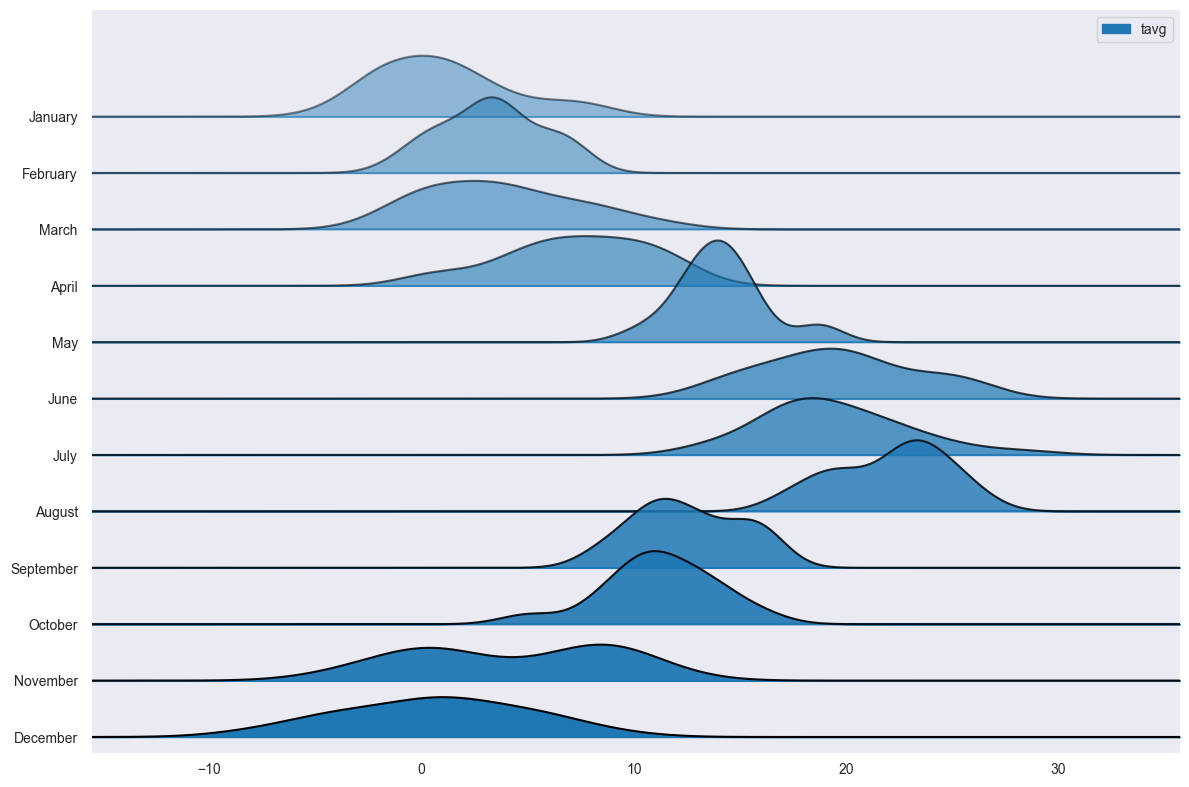

In [86]:

joypy.joyplot(
    data=data,
    by='Month',
    figsize=(12,8),
    fade=True, alpha=0.7,
    legend=True
)
plt.show()

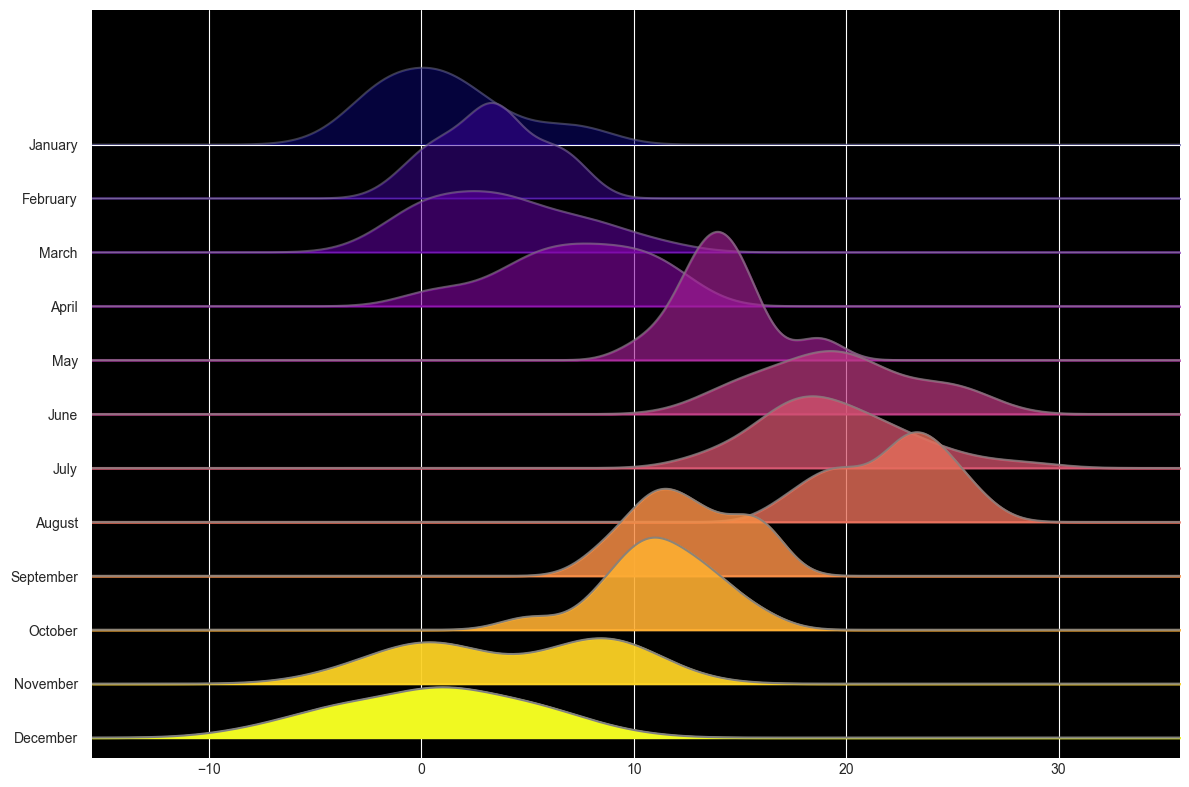

In [87]:
import seaborn as sns
palette = sns.color_palette('RdYlBu', n_colors=12)

color_map = cm.get_cmap('plasma', 12)

joypy.joyplot(
    data=data,
    by='Month',
    figsize=(12,8),
    fade=True,
    alpha=0.7,
    color = [color_map(i) for i in np.linspace(0, 1, 12)],
    #color=['#F44336', '#FF9800', '#FFEB3B', '#4CAF50','#F44336', '#FF9800', '#FFEB3B', '#4CAF50','#F44336', '#FF9800', '#FFEB3B', '#4CAF50'],
    grid=True,
    linewidth=1.5,
    linecolor='grey',
    background='black',
    overlap=1.5,
    legend=False
)

# plt.title('Temperature Distribution by Month in 2022 (Warsaw)', fontsize=18)
# plt.xlabel('Temperature (°C)', fontsize=14)
# plt.ylabel('Month', fontsize=14)
# plt.yticks(fontsize=12)
#
# handles, labels = plt.gca().get_legend_handles_labels()
# labels = ['January', 'February', 'March', 'April', 'May', 'June',
#           'July', 'August', 'September', 'October', 'November', 'December']
# legend = plt.legend(handles, labels, loc='best', frameon=False, fontsize=12)
# legend.set_title('Month', prop={'size': 14})

plt.show()

Recall that these are only examples that aim to inspire you. There is absolutely no need to analyze the codes in detail. Being able to adapt it to your own needs makes more sense.